In [1]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
stok = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv', 
                   index_col = 'Date', parse_dates=True)

In [3]:
stok['2010-03':'2010-04'].head() #Промежуток по времени

,Open,High,Low,Close,Volume
Date,,,,,
2010-03-01,118.85,124.66,117.53,124.54,13300501
2010-03-02,125.01,127.35,124.80,125.53,12098298
2010-03-03,125.40,126.94,124.43,125.89,6443021
2010-03-04,125.96,128.85,125.57,128.53,7509644
2010-03-05,129.13,129.45,127.07,128.91,6771126


In [4]:
stok.resample('2h').asfreq().head() #Усреднение по часам

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.9,7600543.0
2010-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN


In [5]:
stok.resample('1w').mean().head() #Усреднение по неделям

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60


In [6]:
stok.rolling(3).mean().head() #Усреднение оконной функцией размером 3

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06


In [7]:
stok.rolling(3, min_periods=1).mean().head() #Усреднение оконной функцией размером 3 с первой строки

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06


In [8]:
stok.expanding(3).mean().head() #Усреднение с учетом каждой следущей ячейки

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.7600,135.606667,132.200,133.613333,7.879325e+06
2010-01-07,134.0725,134.785000,131.350,132.710000,8.667025e+06
2010-01-08,133.3700,134.564000,130.886,132.872000,8.900386e+06


In [9]:
stok.ewm(alpha=0.7).mean().head() #Усреднение с весами

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06


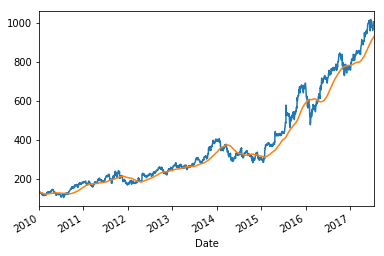

In [10]:
stok['Open'].plot()
stok['Open'].rolling(100, min_periods=1).mean().plot() #Сгладить график

In [11]:
stok.index.weekday_name

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Monday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=1896)

In [12]:
stok.index.weekday_name.value_counts() #Колличество дней недели

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64

In [13]:
stok.index.dayofyear #Извлечь номер дня

Int64Index([  4,   5,   6,   7,   8,  11,  12,  13,  14,  15,
            ...
            184, 186, 187, 188, 191, 192, 193, 194, 195, 198],
           dtype='int64', name='Date', length=1896)

In [14]:
stok.index.weekofyear #Извлечь номер недели

Int64Index([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
            ...
            27, 27, 27, 27, 28, 28, 28, 28, 28, 29],
           dtype='int64', name='Date', length=1896)

In [15]:
stok.index.year #Извлечь из дат года

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=1896)

In [16]:
stok.index.month_name() #Извлечь из дат названия месяцев

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July',
       'July'],
      dtype='object', name='Date', length=1896)

In [17]:
np.mean(stok.index.dayofyear) #Получить номер среднего дня в году

178.00632911392404

In [18]:
stok.index.day.value_counts()

8     65
9     65
10    65
11    65
12    65
23    65
13    65
7     64
14    64
6     63
17    63
22    63
19    63
15    63
16    62
5     62
21    62
3     62
27    62
28    62
20    61
24    61
2     61
26    60
18    60
4     59
1     58
29    58
25    57
30    56
31    35
Name: Date, dtype: int64